# Task I - Cory Wilson

### Initial Imports and Dataframe creation

In [1]:
### Importing required packages
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None

### Creating initial data set from the Churn CSV
data = pd.read_csv('churn_clean.csv')

## Part I

### A. 1.

Can customers be segmented in a way that will allow the company to make better decisions?

### A. 2.

The main goal of this analysis is to establish different grouping or segments of our current and former subscribers.

## Part II

### B. 1.

The k-Means algorithm works by initially segregating data into groups based on the k variable. K will determine the number of groups or clusters. k-Means is also an iterative algorithm. This means that iterations of the algorithm are ran until it feels the most accurate clusters have been found.

k-Means works by initially assigning data points to clusters then creating centroids, which are simply the mean of all the data in a given cluster. The number of centroids the model uses is the same as the value of k. The algorithm then runs again, but the centroids move and means are recalculated. This process runs until the centroids stabilize. (Söder, 2008)

### B. 2.

One main assumption of k-Means clustering is that the data must be spherical in nature. This allows the algorithm to correctly select the clusters more accurately. Graphed spherical shaped data is easier for KMeans to create clusters, but as David Robinson points out in his piece on KMeans clustering, even if the data isn't spherical in nature, not all hope is lost. (Robinson, 2015)

### B. 3. 

Packages used:
- Pandas - Pandas allows a wide varitey of data analytics processes, it is the main library used to import files such as csv's into a format that Python can easily handle. It is also crucial in the creation of additional dataframes.
- SkLearn - SKlearn has a multitude of uses from being the home of the algorithm we will be using, to spliting our data into training and test sets, to also giving us our metrics that will be used to judge how well the model performed.
- Yellowbrick - Yellowbrick is used to easily create elbow diagrams.


## Part III

### C. 1.

One of the major things that must be done is unnessesary columns must be dropped. K-Means cannot use categorical or binary data must be dropped. This is accomplished by using the .drop() method of the pandas package.

### C. 2.

The features that will be included are as follows:
- Children - Continuous
- Age - Continuous
- Income - Continuous
- Outage_sec_perweek - Continuous
- Email - Continuous
- Contacts - Continuous
- Yearly_equip_failure - Continuous
- Tenure - Continuous
- MonthlyCharge - Continuous
- Bandwidth_GB_Year - Continuous

These variables are selected due to their type of data. Binary and categorical data cannot be used in a K-Means algorithm, the majority of columns in this data set fall into this category. The continuous nature of these variables will work within the bounds of K-Means data requirements. These variables will provide our model with a wide swath of data to help create clusters.

### C. 3.

The code block presented below does a few things. The first thing it accomplishes is dropping columns that aren't necessary to this analysis. The newly created dataframe is then presented. 

In [2]:
### Dropping columns that aren't required for clustering
clean_data = data.drop(columns=['CaseOrder','Customer_id',
                                'Interaction','Churn','UID','Population',
                                'Zip','Job','City','Lat','Lng','State',
                                'County','TimeZone','item1','item2',
                                'item3','item4','item5','item6','item7',
                                'item8','Area','Marital','Gender',
                                'Techie','Contract','Port_modem',
                                'Tablet','InternetService','Phone',
                                'Multiple','OnlineSecurity',
                                'OnlineBackup','DeviceProtection',
                                'TechSupport','StreamingTV',
                                'StreamingMovies','PaperlessBilling',
                                'PaymentMethod'])

### Printing the cleaned data set to ensure proper formatting
clean_data

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,0,68,28561.99000,7.97832,10,0,1,6.79551,172.45552,904.53611
1,1,27,21704.77000,11.69908,12,0,1,1.15668,242.63255,800.98277
2,4,50,9609.57000,10.75280,9,0,1,15.75414,159.94758,2054.70696
3,1,48,18925.23000,14.91354,15,2,0,17.08723,119.95684,2164.57941
4,0,83,40074.19000,8.14742,16,2,1,1.67097,149.94832,271.49344
...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74000,9.41593,12,2,0,68.19713,159.97940,6511.25260
9996,4,48,34129.34000,6.74055,15,2,0,61.04037,207.48110,5695.95181
9997,1,48,45983.43000,6.59091,10,0,0,47.41689,169.97410,4159.30580
9998,1,39,16667.58000,12.07191,14,1,0,71.09560,252.62400,6468.45675


### C. 4.

The code below creates a clean_data CSV file, which will be submitted with the project.

In [3]:
clean_data.to_csv('D212 Task 1 Clean Data.csv')

## Part IV

### D. 1.

The code block listed in Section D. 2. is the block where the KMeans clustering takes place. The first section creates a new dataframe with original data to add the clusters the algorithm picks. This section is also where the data is scaled.

The second section uses Yellowbrick to create an elbow plot to assist with the selection of k.

The third section is where KMeans clustering takes place and the cluster chosen for each row is added in new column. The cleaned_data dataframe is also printed for verification in this section.

### D. 2.

In [4]:
### Creating a new dataframe to store the KMeans results with the original non-scaled data
features = list(clean_data.columns)
cleaned_data = clean_data[features]

### Creating a scaler object and scaling the data to make it more uniformed
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data)



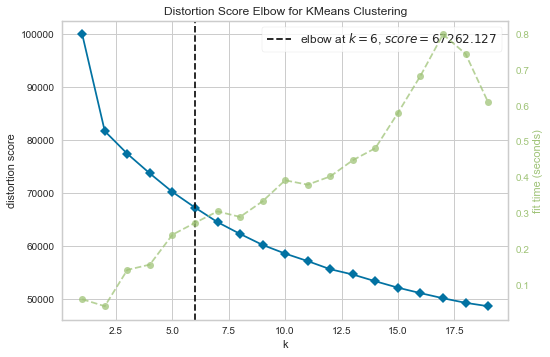

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
### Using Yellowbrick to quickly create an elbow plot to fit the optimum value for k
model = KMeans()
visual = KElbowVisualizer(model, k=(1, 20))
visual.fit(scaled_data)
visual.show()


In [6]:
### Performing the KMeans clustering process and affixing the clusters to the cleaned_data dataframe
clusters = KMeans(n_clusters=6)
cleaned_data['clusters'] = clusters.fit_predict(scaled_data)

### Printing the dataframe to ensure clusters were affixed correctly
cleaned_data

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,clusters
0,0,68,28561.99000,7.97832,10,0,1,6.79551,172.45552,904.53611,0
1,1,27,21704.77000,11.69908,12,0,1,1.15668,242.63255,800.98277,0
2,4,50,9609.57000,10.75280,9,0,1,15.75414,159.94758,2054.70696,0
3,1,48,18925.23000,14.91354,15,2,0,17.08723,119.95684,2164.57941,2
4,0,83,40074.19000,8.14742,16,2,1,1.67097,149.94832,271.49344,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74000,9.41593,12,2,0,68.19713,159.97940,6511.25260,1
9996,4,48,34129.34000,6.74055,15,2,0,61.04037,207.48110,5695.95181,1
9997,1,48,45983.43000,6.59091,10,0,0,47.41689,169.97410,4159.30580,1
9998,1,39,16667.58000,12.07191,14,1,0,71.09560,252.62400,6468.45675,1


## Part V

### E. 1.

The use of a clustering algorithm doesn't not return accuracy in a true sense. While accuracy can be returned, in this instance, it isn't viable data. The data points aren't clustered before clustering occurs, thus, giving nothing to compare it to.

### E. 2.

Using KMeans we were able to find that our data set can be divided into 6 different clusters. These clusters are based on our variety of available data. The implications of this analysis could prove to be important, this gives the company 6 distinct groups to target with a different offers, sales, or promotions that will feel more customized to them. While clustering provides a deeper understanding of the data, without a more thorough investigation into the clusters and what they actually represent, you have just that, clusters.

### E. 3.

One limitation that makes this data set hard to work with is the shear number of features. Without using some form of dimensional reduction the set is hard to handle, and it also makes using KMeans harder as well. Being able to apply dimensional reduction to this set would possibly return better, more clear results.

### E. 4.

The best course of action moving forward would be applying some form of dimensional reduction, then analyzing the data for different segments using the resulting data set. The company could make more sense of the data with only a handful of features rather than the entire set of fifty features.

### Part VI

### H: References

Robinson, D. (2015, January 15). K-means clustering is not a free lunch. Variance Explained. Retrieved October 1, 2021, from http://varianceexplained.org/r/kmeans-free-lunch/.

Söder, O. (2008, May 29). k-means clustering 1. How does k-means clustering work? K-means clustering 1. how does K-means clustering work? Retrieved October 1, 2021, from https://www.fon.hum.uva.nl/praat/manual/k-means_clustering_1__How_does_k-means_clustering_work_.html.

### Coding Resources Used

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.scikit-yb.org/en/latest/api/cluster/elbow.html